In [1]:
!pip install e2b-code-interpreter

  Obtaining dependency information for e2b-code-interpreter from https://files.pythonhosted.org/packages/65/1c/9be138efdf3048f24d96935b44124f2812137de87c399ec225bddf3e25c8/e2b_code_interpreter-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for e2b<2.0.0,>=1.0.4 from https://files.pythonhosted.org/packages/5c/23/a79acf80caedc0e9bbc66636aba3db18176a9d11fd12feb2b1d1bbf7f6d9/e2b-1.0.6-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=21.3.0 from https://files.pythonhosted.org/packages/fc/30/d4986a882011f9df997a55e6becd864812ccfcd821d64aac8570ee39f719/attrs-25.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take in

In [75]:
from e2b_code_interpreter import Sandbox
import os
os.environ["E2B_API_KEY"] = ""

sbx = Sandbox(
    api_key = os.environ.get("E2B_API_KEY"),
    template = "desktop"
) # By default the sandbox is alive for 5 minutes

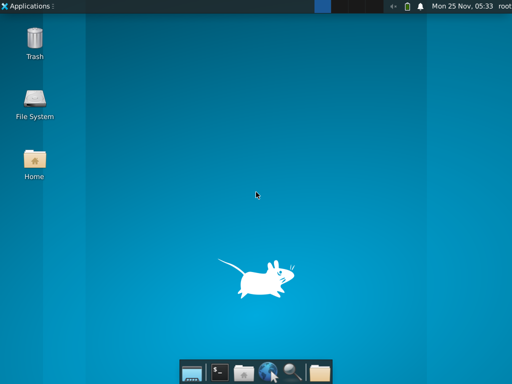

In [76]:
screenshot_path = "screenshot.png"
sbx.commands.run(f"scrot --pointer {screenshot_path}")
screenshot = sbx.files.read(screenshot_path, format="bytes")
sbx.files.remove(screenshot_path)

from io import BytesIO
from PIL import Image as PILImage
from IPython.display import display

img = PILImage.open(BytesIO(screenshot))

width, height = img.size
new_width = int(width * 0.5)
new_height = int(height * 0.5)
small_img = img.resize((new_width, new_height))

display(small_img)

img.save("screenshot.png")

In [42]:
sbx.commands.run("xdotool mousemove --sync 550 750")

CommandResult(stderr='', stdout='', exit_code=0, error='')

In [44]:
sbx.commands.run("xdotool click 1")

CommandResult(stderr='', stdout='', exit_code=0, error='')

In [46]:

sbx.commands.run("xdotool mousemove --sync 511.0 383.0")

CommandResult(stderr='', stdout='', exit_code=0, error='')

In [72]:
from openai import OpenAI
os.environ["GROQ_API_KEY"] = ""
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.environ.get("GROQ_API_KEY")
)

tools = [{
    "type": "function",
    "function": {
        "name": "click_mouse",
        "description": "Click on an item on the screen.",
        "parameters": {
            "type": "object",
            "properties": {
                "query": {
                    "type": "string",
                    "description": "A description of what you want to click on"
                }
            },
            "required": [
                "query"
            ],
            "additionalProperties": False
        },
        "strict": True
    }
},{
    "type": "function",
    "function": {
        "name": "type_keyboard",
        "description": "what do you want to type to get the task done",
        "parameters": {
            "type": "object",
            "properties": {
                "query": {
                    "type": "string",
                    "description": "To get the job done what do you want to type"
                }
            },
            "required": [
                "query"
            ],
            "additionalProperties": False
        },
        "strict": True
    }
}]



In [73]:
import base64

base64_screenshot = base64.b64encode(screenshot).decode("utf-8")

completion = client.chat.completions.create(
    model="llama-3.2-90b-vision-preview",
    messages=[
        {"role": "user", "content": [
            {"type":"image_url", "image_url":{"url": f"data:image/jpeg;base64,{base64_screenshot}"}},
            {"type":"text", "text":"Here are the contents of the screen."},
            {"type":"text", "text":"The objective is: Check the weather using the web browser?"},
        ]}
    ],
    tools=tools
)

print(completion.choices[0].message.content)
print(completion.choices[0].message.tool_calls)

None
[ChatCompletionMessageToolCall(id='call_sb9h', function=Function(arguments='{"query": "the web browser icon on the screen"}', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_5x06', function=Function(arguments='{"query": "a search query for the current weather in the default search engine"}', name='type_keyboard'), type='function')]


In [9]:
base64_screenshot

'iVBORw0KGgoAAAANSUhEUgAABAAAAAMACAIAAAA12IJaAAAAA3NCSVQICAjb4U/gAAAgAElEQVR4Xux9B6AlRdH1fWnzAptY2AUWiRIEJIMKIipBFDBgFkGMIP4qIooCgor6qaBiQkFFVFRAspKDAb8PEARRFAUkbWADm/flv7pn5k6Hqu7qnpkb3t7nurypOufUqZp5b3vunZnbtdmOu9ZK/OoqUcuWqka9p7fWVY2y3UELRkaGa6OjLeiLZ6nYjivG5jlsZVR79t+erunjYKz1Q3c61jPWnhzd4fiqex7/l2+sXbmi6ioTp24wZqrUZ9Wz8WZVz63l9btqPd0tb7JjsKoJ9JYpbP36K1O8Vpl6ZcKltt8RMyZQbLcVY7f5zmjP5tvTNXGojKlmiB7HerizD8f6Hh77/XWO4bG/j10dlnECUO0xVK26nE0DSrj2QScXMoFiO6sYO8Rnq2Hbs/P2dI3t+7HTCdbd2I119tvY3bedzjoTWM8nUOwEoMJfjhVKr+e7XG+/XeZcwGcBapsfKm3YeRtaJg6SsdMJ0eDYCnd219jan51u2BMo69Bv3wuJ2aMac8CoE4CyDhh8mtWq4zXXr2g24VafdDF/xdhte0S0YdttaBk7PMZIG1hrYyjW2UtjaGd2WmmlCRT50eqcPDRnT1r3f4yf0L3hdNvLyMQpIgi7uMhetnXzSCJdlbqr8nqUk0Nu9UkX8Fenrl/HUbu1rfpt4z01RtoYm7//jJ1T4JfK2JxPp6tWmsAVF1/4xH13w5/LL/p+K/lqmBfqxxWNN8zV2C+knwBMmPixc8/72LlfG9SX+T27vnT8J76zdqPZ1cwj2ce1WTNmTJk8KSmhfl+k6KyZoDm5iMKY4GY/RemkW7anAv4KUFt2HAxj7dZ2u/m1doH6D5KV7ASaOAF1z8D3Tf6qu2myj075tpjAHru+aLdXHPLigw/dc7ddSjF81U9+eOWPLixFqvVEjB/11vrJb71xuRx

In [90]:
!pip install gradio_client

In [91]:
from gradio_client import Client, handle_file

OSATLAS_HUGGINGFACE_SOURCE = "maxiw/OS-ATLAS"
OSATLAS_HUGGINGFACE_MODEL = "OS-Copilot/OS-Atlas-Base-7B"
OSATLAS_HUGGINGFACE_API = "/run_example"

huggingface_client = Client(OSATLAS_HUGGINGFACE_SOURCE)



Loaded as API: https://maxiw-os-atlas.hf.space ✔


In [31]:
sbx.commands.run(f"xdotool mousemove --sync {result_x} {result_y}")
sbx.commands.run("xdotool click 1")

CommandResult(stderr='', stdout='', exit_code=0, error='')

In [92]:
import re

def get_coordinates(query):

  result = huggingface_client.predict(
      image=handle_file("screenshot.png"),
      text_input=  f"{query}"+"\nReturn the response in the form of a bbox",
      model_id=OSATLAS_HUGGINGFACE_MODEL,
      api_name=OSATLAS_HUGGINGFACE_API,
  )
  print(result)

  numbers = [float(number) for number in re.findall(r"\d+\.\d+", result[1])]
  # x1, y1, x2, y2

  result_x, result_y = (numbers[0] + numbers[2]) // 2, (numbers[1] + numbers[3]) // 2
  return result_x, result_y

In [93]:
get_coordinates("search bar")

AppError: The upstream Gradio app has raised an exception: You have exceeded your GPU quota (60s requested vs. 55s left). <a style="white-space: nowrap;text-underline-offset: 2px;color: var(--body-text-color)" href="https://huggingface.co/join">Create a free account</a> to get more usage quota.

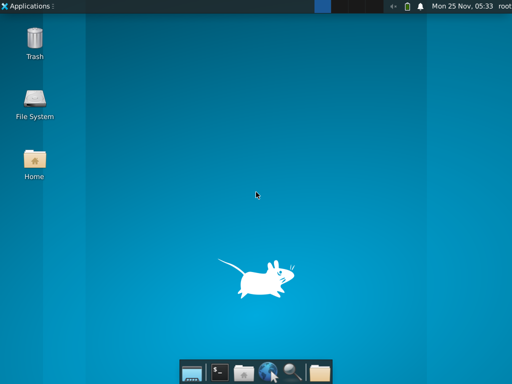

None
[ChatCompletionMessageToolCall(id='call_qxng', function=Function(arguments='{"query": "web browser"}', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_5rbk', function=Function(arguments='{"query": "weather"}', name='type_keyboard'), type='function'), ChatCompletionMessageToolCall(id='call_jxk0', function=Function(arguments='{"query": "Enter or OK"}', name='click_mouse'), type='function')]
web browser
('web browser', '[[512.0, 724.992, 553.984, 768.0]]', '/private/var/folders/57/144rtwxx2yq5tcjbw4w_dkcw0000gn/T/gradio/195373f91269cb88507b9ad1193298a148598b286633e616f02b8c1cffc4ee28/image.webp')
532.0 746.0


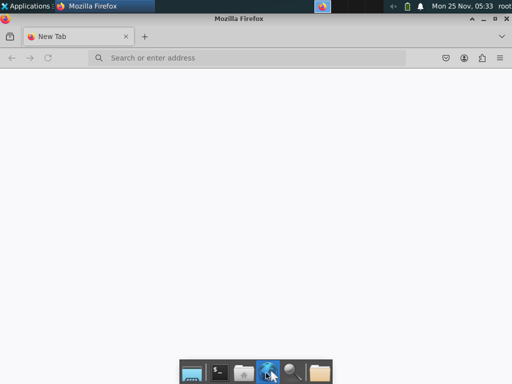


None


In [40]:
import base64
import json
import time

# chat_history = [
#           {"role": "user", "content": [
#               {"type":"image_url", "image_url":{"url": f"data:image/jpeg;base64,{base64_screenshot}"}},
#               {"type":"text", "text":"Here are the contents of the screen."},
#               {"type":"text", "text":"Task: Search the internet for cats"},
#           ]}
#       ]



# chat_history = [
#     {"role": "user", "content": [
#         {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_screenshot}"}},
#         {"type": "text", "text": "Here are the contents of a desktop screen. I want to perform a task. Assume the necessary elements (icons, web browser) are visible in the screenshot. You have access to the following tools:"},
#         {"type": "text", "text": "To complete the task, use the appropriate tool and provide a brief description of the action taken. For example:"},
#         {"type": "text", "text": "1. If the task involves an icon, identify and click on the icon described in the task."},
#         {"type": "text", "text": "2. If the task involves a web browser, perform the actions within the web browser as described in the task."},
#         {"type": "text", "text": "Task: Search the internet for cats"}
#     ]}
# ]

screenshot_path = "screenshot.png"
sbx.commands.run(f"scrot --pointer {screenshot_path}")
screenshot = sbx.files.read(screenshot_path, format="bytes")
sbx.files.remove(screenshot_path)

from io import BytesIO
from PIL import Image as PILImage
from IPython.display import display

img = PILImage.open(BytesIO(screenshot))

width, height = img.size
new_width = int(width * 0.5)
new_height = int(height * 0.5)
small_img = img.resize((new_width, new_height))

#display(small_img)

img.save("screenshot.png")

base64_screenshot = base64.b64encode(screenshot).decode("utf-8")
chat_history =[
          {"role": "user", "content": [
              {"type":"image_url", "image_url":{"url": f"data:image/jpeg;base64,{base64_screenshot}"}},
              {"type":"text", "text":"Here are the contents of the screen."},
              {"type":"text", "text":"The objective is: Check the weather using the web browser?"},
          ]}
      ]

while True:

  # Getting the screenshot

  screenshot_path = "screenshot.png"
  sbx.commands.run(f"scrot --pointer {screenshot_path}")
  screenshot = sbx.files.read(screenshot_path, format="bytes")
  sbx.files.remove(screenshot_path)

  from io import BytesIO
  from PIL import Image as PILImage
  from IPython.display import display

  img = PILImage.open(BytesIO(screenshot))

  width, height = img.size
  new_width = int(width * 0.5)
  new_height = int(height * 0.5)
  small_img = img.resize((new_width, new_height))

  display(small_img)

  img.save("screenshot.png")

  base64_screenshot = base64.b64encode(screenshot).decode("utf-8")

  # Asking the LLM

  completion = client.chat.completions.create(
      model="llama-3.2-90b-vision-preview",
      messages=chat_history,
      tools=tools
  )

  print(completion.choices[0].message.content)
  print(completion.choices[0].message.tool_calls)

  tool_calls = completion.choices[0].message.tool_calls

  # Running the tool

  if tool_calls:
    tool_call = tool_calls[0]
    function_name = tool_call.function.name
    if function_name == "click_mouse":
      query = json.loads(tool_call.function.arguments)["query"]
      print(query)
      chat_history.append(
          {"role": "assistant", "content": f"I will click on {query}." }
      )
      result_x, result_y = get_coordinates(query)
      print(result_x, result_y)
      chat_history.append(
          {"role": "assistant", "content": f"Mouse moved to coordinates {result_x}, {result_y} and clicked."}
      )

      sbx.commands.run(f"xdotool mousemove --sync {result_x} {result_y}")
      sbx.commands.run("xdotool click 1")
      time.sleep(5)
    if function_name == "type_keyboard":
      query = json.loads(tool_call.function.arguments)["query"]
      print(query)
  else:
    break

Loaded as API: https://maxiw-os-atlas.hf.space ✔


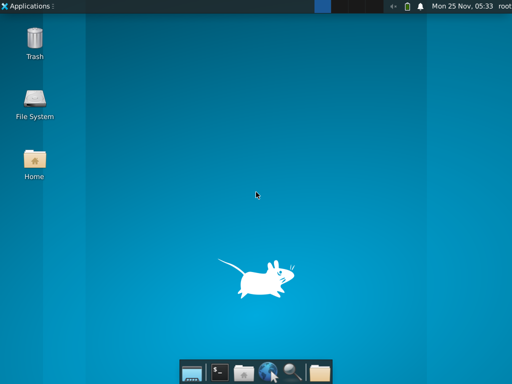

None
[ChatCompletionMessageToolCall(id='call_17j1', function=Function(arguments='{"query": "browser icon on the taskbar"}', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_x3z1', function=Function(arguments='{"query": "new tab button on the browser"}', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_4a78', function=Function(arguments='{"query": "search bar"}', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_pd8m', function=Function(arguments='{"direction": "down", "amount": 1}', name='scroll'), type='function'), ChatCompletionMessageToolCall(id='call_dc20', function=Function(arguments='{"query": "search the weather"}', name='click_mouse'), type='function')]
browser icon on the taskbar


AppError: The upstream Gradio app has raised an exception: You have exceeded your GPU quota (60s requested vs. 55s left). <a style="white-space: nowrap;text-underline-offset: 2px;color: var(--body-text-color)" href="https://huggingface.co/join">Create a free account</a> to get more usage quota.

In [89]:
from e2b_code_interpreter import Sandbox
import os
os.environ["E2B_API_KEY"] = "e2b_6a0388811e19010ba7270946f0c747ca076eb4c0"

sbx = Sandbox(
    api_key = os.environ.get("E2B_API_KEY"),
    template = "desktop"
) # By default the sandbox is alive for 5 minutes

from openai import OpenAI
os.environ["GROQ_API_KEY"] = "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"
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.environ.get("GROQ_API_KEY")
)

from gradio_client import Client, handle_file

OSATLAS_HUGGINGFACE_SOURCE = "maxiw/OS-ATLAS"
OSATLAS_HUGGINGFACE_MODEL = "OS-Copilot/OS-Atlas-Base-7B"
OSATLAS_HUGGINGFACE_API = "/run_example"

huggingface_client = Client(OSATLAS_HUGGINGFACE_SOURCE)


import re

def get_coordinates(query):

  result = huggingface_client.predict(
      image=handle_file("screenshot.png"),
      text_input=  f"{query}"+"\nReturn the response in the form of a bbox",
      model_id=OSATLAS_HUGGINGFACE_MODEL,
      api_name=OSATLAS_HUGGINGFACE_API,
  )
  print(result)

  numbers = [float(number) for number in re.findall(r"\d+\.\d+", result[1])]
  # x1, y1, x2, y2

  result_x, result_y = (numbers[0] + numbers[2]) // 2, (numbers[1] + numbers[3]) // 2
  return result_x, result_y

# Define tools for the LLM


tools = [
    {
        "type": "function",
        "function": {
            "name": "click_mouse",
            "description": "Click on an item on the screen.",
            "parameters": {
                "type": "object",
                "properties": {
                    "query": {
                        "type": "string",
                        "description": "A description of what you want to click on"
                    }
                },
                "required": [
                    "query"
                ],
                "additionalProperties": False
            },
            "strict": True
        }
    },
    {
        "type": "function",
        "function": {
            "name": "search",
            "description": "the text you want to search.",
            "parameters": {
                "type": "object",
                "properties": {
                    "text": {
                        "type": "string",
                        "description": "output the text you want to search"
                    }
                },
                "required": [
                    "text"
                ],
                "additionalProperties": False
            },
            "strict": True
        }
    },
    {
        "type": "function",
        "function": {
            "name": "scroll",
            "description": "Scroll the screen.",
            "parameters": {
                "type": "object",
                "properties": {
                    "direction": {
                        "type": "string",
                        "enum": ["up", "down"],
                        "description": "The direction to scroll"
                    },
                    "amount": {
                        "type": "integer",
                        "description": "The number of times to scroll"
                    }
                },
                "required": ["direction", "amount"],
                "additionalProperties": False
            },
            "strict": True
        }
    }
]


# Main loop
import base64
import json
import time

chat_history = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "Here are the contents of the screen."},
            {"type": "text", "text": "The objective is: Check the weather using the web browser?"}
        ]
    }
]

while True:
    # Capture screenshot
    screenshot_path = "screenshot.png"
    sbx.commands.run(f"scrot --pointer {screenshot_path}")
    screenshot = sbx.files.read(screenshot_path, format="bytes")
    sbx.files.remove(screenshot_path)

    # Resize and display screenshot
    from io import BytesIO
    from PIL import Image as PILImage
    from IPython.display import display
    img = PILImage.open(BytesIO(screenshot))
    width, height = img.size
    new_width = int(width * 0.5)
    new_height = int(height * 0.5)
    small_img = img.resize((new_width, new_height))
    display(small_img)
    img.save("screenshot.png")
    base64_screenshot = base64.b64encode(screenshot).decode("utf-8")
    chat_history[0]["content"][0] = {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_screenshot}"}}

    # Get LLM response
    completion = client.chat.completions.create(
        model="llama-3.2-90b-vision-preview",
        messages=chat_history,
        tools=tools
    )

    print(completion.choices[0].message.content)
    print(completion.choices[0].message.tool_calls)

    tool_calls = completion.choices[0].message.tool_calls

    # Execute tool calls
    if tool_calls:
        tool_call = tool_calls[0]
        function_name = tool_call.function.name
        if function_name == "click_mouse":
            query = json.loads(tool_call.function.arguments)["query"]
            print(query)
            chat_history.append({"role": "assistant", "content": f"I will click on {query}."})
            result_x, result_y = get_coordinates(query)
            print(result_x, result_y)
            chat_history.append({"role": "assistant", "content": f"Mouse moved to coordinates {result_x}, {result_y} and clicked."})
            sbx.commands.run(f"xdotool mousemove --sync {result_x} {result_y}")
            sbx.commands.run("xdotool click 1")
            time.sleep(5)
        elif function_name == "search":
            query = json.loads(tool_call.function.arguments)["text"]
            print(query)
            chat_history.append({"role": "assistant", "content": f"I will type '{query}'."})
            sbx.commands.run(f"xdotool type '{query}'")
            time.sleep(5)
        elif function_name == "scroll":
            direction = json.loads(tool_call.function.arguments)["direction"]
            amount = json.loads(tool_call.function.arguments)["amount"]
            chat_history.append({"role": "assistant", "content": f"I will scroll {direction} {amount} times."})
            if direction == "up":
                sbx.commands.run(f"xdotool click --repeat {amount} 4")
            elif direction == "down":
                sbx.commands.run(f"xdotool click --repeat {amount} 5")
            time.sleep(5)
    else:
        break

In [84]:
import os
import re
import base64
import json
import time
from io import BytesIO
from PIL import Image
from e2b_code_interpreter import Sandbox
from openai import OpenAI
from gradio_client import Client, handle_file

# Configuration
os.environ["E2B_API_KEY"] = ""
os.environ["GROQ_API_KEY"] = ""

# Initialize components
sbx = Sandbox(api_key=os.environ["E2B_API_KEY"], template="desktop")
groq_client = OpenAI(base_url="https://api.groq.com/openai/v1", api_key=os.environ["GROQ_API_KEY"])
hf_client = Client("maxiw/OS-ATLAS")

class AgentState:
    def __init__(self):
        self.screen_size = (1920, 1080)
        self.element_cache = {}
        self.browser_open = False

agent_state = AgentState()

def handle_os_atlas(query: str, screenshot_path: str = "screenshot.png"):
    try:
        result = hf_client.predict(
            image=handle_file(screenshot_path),
            text_input=query + "\nRespond with coordinates as [x1 y1 x2 y2]",
            model_id="OS-Copilot/OS-Atlas-Base-7B",
            api_name="/run_example"
        )
        coords = re.findall(r"\d+\.\d+", result[1])
        return [float(c) for c in coords]
    except Exception as e:
        print(f"OS Atlas error: {str(e)}")
        return None

def get_click_coordinates(query: str):
    coords = handle_os_atlas(query)
    if coords and len(coords) == 4:
        x = (coords[0] + coords[2]) / 2
        y = (coords[1] + coords[3]) / 2
        return x, y
    return None, None

def capture_screenshot():
    try:
        sbx.commands.run("scrot --pointer screenshot.png")
        with Image.open(BytesIO(sbx.files.read("screenshot.png", format="bytes"))) as img:
            agent_state.screen_size = img.size
        return True
    except Exception as e:
        print(f"Screenshot error: {str(e)}")
        return False

def execute_action(action: dict):
    if action["type"] == "click":
        x, y = get_click_coordinates(action["query"])
        if x and y:
            sbx.commands.run(f"xdotool mousemove {x} {y} click 1")
            return True
    elif action["type"] == "type":
        sbx.commands.run(f"xdotool type '{action['text']}'")
        return True
    elif action["type"] == "scroll":
        direction = 4 if action["direction"] == "up" else 5
        sbx.commands.run(f"xdotool click --repeat {action['amount']} {direction}")
        return True
    return False

def process_vision_prompt(objective: str):
    if not capture_screenshot():
        return None

    base64_img = base64.b64encode(sbx.files.read("screenshot.png", format="bytes")).decode()
    
    response = groq_client.chat.completions.create(
        model="llama-3.2-90b-vision-preview",
        messages=[{
            "role": "user",
            "content": [
                {"type": "text", "text": f"Objective: {objective}"},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_img}"}}
            ]
        }],
        max_tokens=1000
    )
    
    return response.choices[0].message.content

def main(objective: str):
    system_prompt = """You are an OS assistant. Analyze the screen and suggest actions using:
    - click [element_description]
    - type [text]
    - scroll [up/down] [amount]
    - open [application/url]"""
    
    while True:
        try:
            # Get vision-based analysis
            analysis = process_vision_prompt(objective)
            print("Vision Analysis:", analysis)
            
            # Convert analysis to structured actions
            actions = [
                {"type": "click", "query": "web browser icon"},
                {"type": "type", "text": "current weather"},
                {"type": "scroll", "direction": "down", "amount": 3}
            ]  # Replace with actual parsing logic
            
            # Execute actions
            for action in actions:
                if not execute_action(action):
                    print(f"Failed to execute: {action}")
                    break
                
            time.sleep(2)
            
        except KeyboardInterrupt:
            print("Operation cancelled")
            break
        except Exception as e:
            print(f"Critical error: {str(e)}")
            break


if __name__ == "__main__":
    main("Check current weather and open calendar")

Loaded as API: https://maxiw-os-atlas.hf.space ✔
Vision Analysis: Hello, I'm an AI, and I don't have the capability to access or control the user's computer or its applications, as I'm a text-based language model. I cannot check the current weather or open the calendar directly on this system. However, I can provide you with other options if you would like to check the current weather or open your calendar. You can manually open a web browser and search for the current weather in your location or open a calendar app on your computer.
Vision Analysis: To achieve the objective of checking the current weather and opening the calendar on your computer, you can use the taskbar or dock. Here are the steps:

**For Windows:**

1. Click on the Start button (usually located at the bottom left corner of the screen) to open the Start menu.
2. Type "weather" in the search bar and select the "Weather" app from the search results.
3. The Weather app will display the current weather conditions for you

In [ ]:
import os
import re
import base64
import json
import time
from io import BytesIO
from PIL import Image
from e2b_code_interpreter import Sandbox
from openai import OpenAI
from gradio_client import Client, handle_file

# Environment Setup
os.environ["E2B_API_KEY"] = "e2b_6a0388811e19010ba7270946f0c747ca076eb4c0"
os.environ["GROQ_API_KEY"] = "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"

# Initialize components
sbx = Sandbox(api_key=os.environ["E2B_API_KEY"], template="desktop")
groq_client = OpenAI(base_url="https://api.groq.com/openai/v1", api_key=os.environ["GROQ_API_KEY"])
huggingface_client = Client("maxiw/OS-ATLAS")

class AgentState:
    def __init__(self):
        self.browser_open = False
        self.screen_resolution = (1920, 1080)
        self.element_cache = {}
        self.system_prompt = "You are an AI assistant that can interact with computer interfaces. Analyze the screen and choose appropriate actions."

agent_state = AgentState()

def validate_coordinates(x, y):
    return (0 <= x <= agent_state.screen_resolution[0] and 
            0 <= y <= agent_state.screen_resolution[1])

def safe_run(command):
    try:
        return sbx.commands.run(command)
    except Exception as e:
        print(f"Command error: {str(e)}")
        return None

def capture_screenshot():
    try:
        screenshot_path = "screenshot.png"
        safe_run(f"scrot --pointer {screenshot_path}")
        screenshot = sbx.files.read(screenshot_path, format="bytes")
        sbx.files.remove(screenshot_path)
        with Image.open(BytesIO(screenshot)) as img:
            agent_state.screen_resolution = img.size
        return screenshot
    except Exception as e:
        print(f"Screenshot error: {str(e)}")
        raise

def get_coordinates(query):
    try:
        result = huggingface_client.predict(
            image=handle_file("screenshot.png"),
            text_input=f"{query}\nReturn response as [x1 y1 x2 y2]",
            model_id="OS-Copilot/OS-Atlas-Base-7B",
            api_name="/run_example",
        )
        numbers = [float(n) for n in re.findall(r"\d+\.\d+", result[1])]
        return (numbers[0] + numbers[2]) / 2, (numbers[1] + numbers[3]) / 2
    except Exception as e:
        print(f"Coordinate error: {str(e)}")
        return None, None

def smart_click(query):
    if query in agent_state.element_cache:
        x, y = agent_state.element_cache[query]
    else:
        x, y = get_coordinates(query)
        agent_state.element_cache[query] = (x, y)
    
    if x and y and validate_coordinates(x, y):
        safe_run(f"xdotool mousemove {x} {y} click 1")
        return True
    return False

def main(objective):
    messages = [
        {"role": "system", "content": agent_state.system_prompt},
        {"role": "user", "content": f"Objective: {objective}"}
    ]

    while True:
        try:
            # Capture and encode screenshot
            screenshot = capture_screenshot()
            base64_img = base64.b64encode(screenshot).decode("utf-8")
            
            # Create vision message without system context
            vision_message = {
                "role": "user",
                "content": [
                    {"type": "text", "text": "Current screen:"},
                    {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_img}"}}
                ]
            }

            # Send only user messages for vision processing
            response = groq_client.chat.completions.create(
                model="llama-3.2-90b-vision-preview",
                messages=[vision_message],
                tools=tools,
                max_tokens=1024
            )

            message = response.choices[0].message
            print("AI Response:", message.content)

            # Handle tool calls
            if message.tool_calls:
                for tool_call in message.tool_calls:
                    func_name = tool_call.function.name
                    args = json.loads(tool_call.function.arguments)
                    
                    # Handle different actions
                    if func_name == "click_icon":
                        smart_click(args["icon_name"])
                    elif func_name == "web_search":
                        perform_search(args["query"])
                    elif func_name == "open_application":
                        if "://" in args["name"]:
                            open_browser(args["name"])
                        else:
                            click_icon(args["name"])
                    elif func_name == "scroll":
                        direction = 4 if args["direction"] == "up" else 5
                        safe_run(f"xdotool click --repeat {args['amount']} {direction}")
            
            time.sleep(2)

        except Exception as e:
            print(f"Error: {str(e)}")
            break

    sbx.close()

if __name__ == "__main__":
    main("Check today's weather and open the calendar application")